In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
from mediaug.dataset import Dataset
from mediaug.augment import randomly_insert_cells
from mediaug.image_utils import get_blank_mask
from mediaug.visulize import plot_img_and_mask
import numpy as np
import random
from itertools import cycle

In [125]:
cells = Dataset('/Users/seanwade/projects/cancerDetection/data/sipakmed_processed/cells_256')
slides = Dataset('/Users/seanwade/projects/cancerDetection/data/sipakmed_processed/slides')

In [126]:
ds = Dataset('/Users/seanwade/Desktop/new_ds', ['all'])

In [127]:
good_slides = slides['superficial-intermediate'] + slides['parabasal']
random.shuffle(good_slides)
slide_generator = cycle(good_slides) # make infinite generator

In [128]:
bad_cells = list(set(cells.classes) - set(['superficial-intermediate', 'parabasal']))               

In [129]:
amount_data = 100

In [151]:
slide.img.shape

(1536, 2048, 3)

(1325, 503) 355 1.020600141610863
(589, 1815) 133 1.0660444570658867
(1409, 709) 108 0.9589759017473415
(164, 1097) 27 0.9647280660121226
(1286, 459) 109 0.9581161407324391


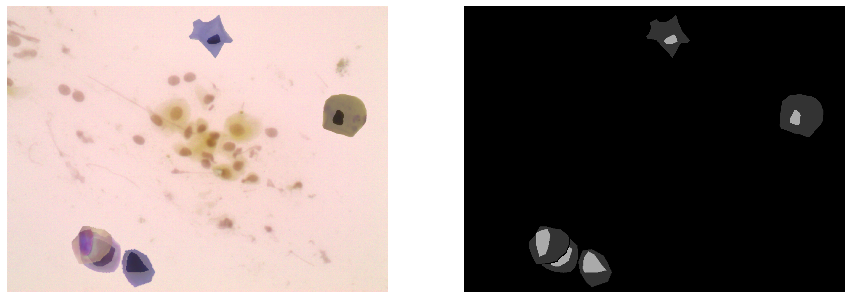

(1330, 337) 93 1.1054389584557598
(16, 708) 180 0.9469746709761718


ValueError: could not broadcast input array from shape (32,256) into shape (144,256)

In [167]:
for i in range(amount_data):
    slide = next(slide_generator)
    new_img, new_mask = randomly_insert_cells(slide.img, get_blank_mask(slide.img), cells, bad_cells, (0,6))
    ds.add_data(new_img, new_mask, 'all', i)
    plot_img_and_mask(new_img, new_mask)

In [162]:
a = [1,2,3,4,5,6]

In [163]:
a[0:-4]

[1, 2]